In [2]:
#Importing data
import pandas as pd

data = pd.read_csv('pollution_us_2000_2016.csv', header=0)
print(data.head())

   Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion

In [3]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
import warnings

In [4]:
plt.style.use('fivethirtyeight')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [5]:
##Dropping unneccessary columns
data = data.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
data.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [6]:
data.isna().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [6]:
data.drop_duplicates()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


In [8]:
data.isna().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [7]:
## Prepare all 4 AQIs against state and date 
dataSt = data[['State','Date Local','NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]
dataSt = dataSt.dropna(axis='rows')  # Delete rows with NAs
dataSt = dataSt[dataSt.State!='Country Of Mexico'] #Delete Mexico since we're interested in the US
dataSt['Date Local'] = pd.to_datetime(dataSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value


In [8]:
dataSt.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
1,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
5,Arizona,2000-01-02,22.958333,34,0.013375,27,1.958333,4.0,1.066667,26.0
9,Arizona,2000-01-03,38.125000,48,0.007958,14,5.250000,16.0,1.762500,28.0
13,Arizona,2000-01-04,40.260870,72,0.014167,28,7.083333,23.0,1.829167,34.0
17,Arizona,2000-01-05,48.450000,58,0.006667,10,8.708333,21.0,2.700000,42.0


In [11]:
dataSt.isna().sum()

State         0
Date Local    0
NO2 Mean      0
NO2 AQI       0
O3 Mean       0
O3 AQI        0
SO2 Mean      0
SO2 AQI       0
CO Mean       0
CO AQI        0
dtype: int64

<AxesSubplot:>

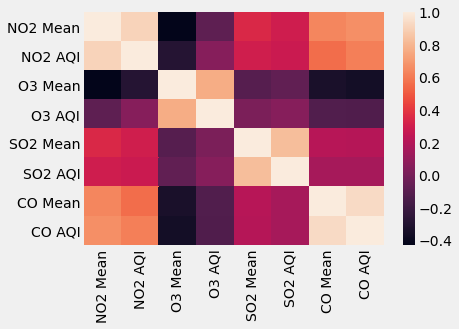

In [12]:
corr = dataSt.corr()
sns.heatmap(corr)

In [13]:
indices = dataSt['State'] == 'Arizona'
az = dataSt.loc[indices,:] #extract dataframe with just arizona information

In [14]:
az.set_index('Date Local')

,State,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
Date Local,,,,,,,,,
2000-01-01,Arizona,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
2000-01-02,Arizona,22.958333,34,0.013375,27,1.958333,4.0,1.066667,26.0
2000-01-03,Arizona,38.125000,48,0.007958,14,5.250000,16.0,1.762500,28.0
2000-01-04,Arizona,40.260870,72,0.014167,28,7.083333,23.0,1.829167,34.0
2000-01-05,Arizona,48.450000,58,0.006667,10,8.708333,21.0,2.700000,42.0
...,...,...,...,...,...,...,...,...,...
2016-03-27,Arizona,4.545833,9,0.035042,44,0.091667,0.0,0.275000,3.0
2016-03-28,Arizona,4.343478,13,0.035583,40,0.073913,0.0,0.258333,3.0
2016-03-29,Arizona,1.787500,5,0.041417,42,0.000000,0.0,0.200000,2.0


<AxesSubplot:xlabel='Date Local'>

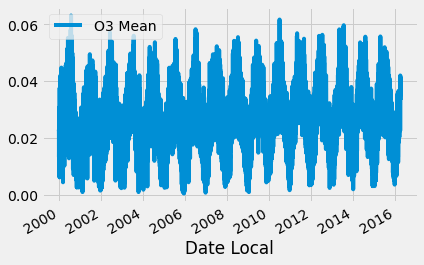

In [15]:
az.plot(x='Date Local', y='O3 Mean')

In [9]:
#going to group by date. There are duplicates, so I'm taking the mean values of those.
dataSt = dataSt.groupby(['Date Local']).mean()  # Take mean values if there are depulicated entries


In [10]:
yn = dataSt['NO2 AQI'].resample('M').mean()
yo = dataSt['O3 AQI'].resample('M').mean()
yc = dataSt['CO AQI'].resample('M').mean()
ys = dataSt['SO2 AQI'].resample('M').mean()

In [11]:
yn.head(5)

Date Local
2000-01-31    36.634535
2000-02-29    35.046450
2000-03-31    32.233823
2000-04-30    30.944411
2000-05-31    28.748345
Freq: M, Name: NO2 AQI, dtype: float64

#I've lost the state column. I'm going to analyze everything together, and then maybe seperate out by state later.

Text(0, 0.5, 'CO AQI')

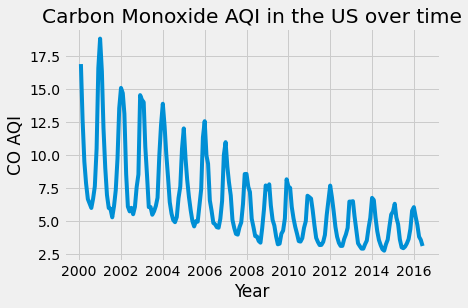

In [19]:
plt.plot(yc)
plt.title('Carbon Monoxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('CO AQI')

Text(0, 0.5, 'O3 AQI')

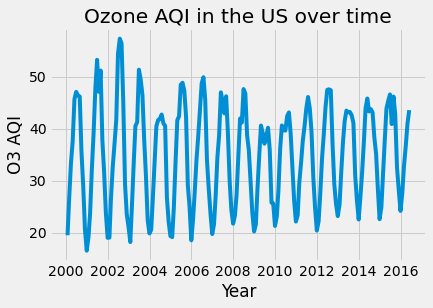

In [20]:
plt.plot(yo)
plt.title('Ozone AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('O3 AQI')

Text(0, 0.5, 'NO2 AQI')

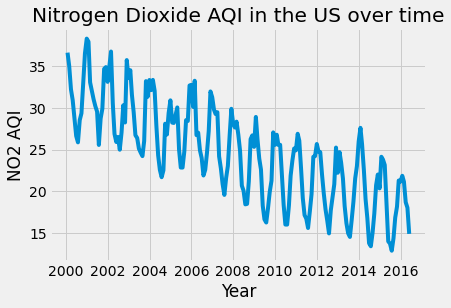

In [21]:
plt.plot(yn)
plt.title('Nitrogen Dioxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('NO2 AQI')

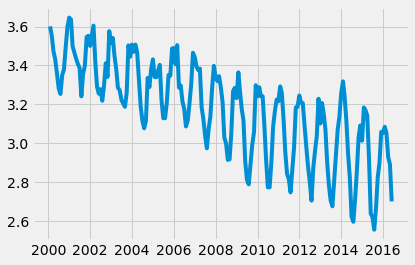

In [17]:
#log of no2 aqi levels
plt.plot(np.log(yn))

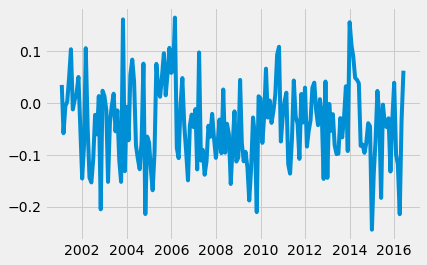

In [52]:
#remove seasonality
plt.plot(np.log(yn).diff(12))

Text(0, 0.5, 'SO2 AQI')

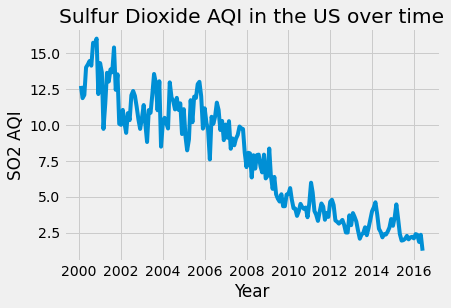

In [22]:
plt.plot(ys)
plt.title('Sulfur Dioxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('SO2 AQI')

#Apart from Ozone, all the greenhouse gas AQIs have gone down over the last 16 years. This was an unexpected and positive finding. According to the EPA, any AQI rating under 50 is considered 'Good.' So overall, the US air quality has been consistently good and getting better. Again, very surprising.
#It is also apparent that there's a strong seasonality component to most of these, except maybe S02.

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(yn)
print('The p-value for the ADF test is ', result[1])

The p-value for the ADF test is  0.8529592836980281


In [55]:
yn2 = np.log(yn).diff(12).dropna()

In [56]:
result = adfuller(yn2)
print('The p-value for the ADF test is ', result[1])

The p-value for the ADF test is  0.0015209873245414093


In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

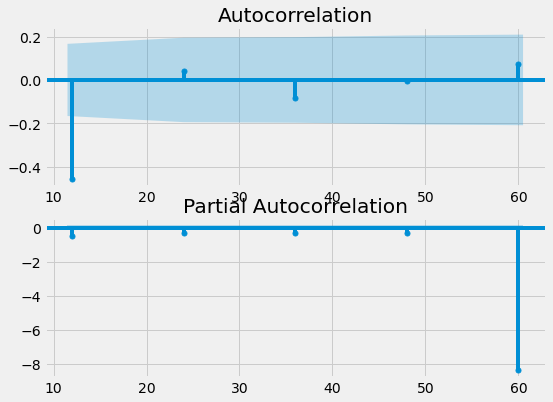

In [61]:
# Make list of lags
lags=[12,24,36,48,60]
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(yn2, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(yn2, lags=lags, zero=False, ax=ax2)

plt.show()

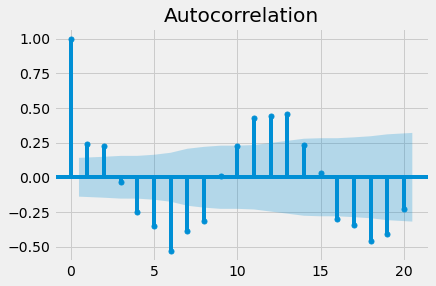

In [40]:
#take first difference of the yn series
chg_no2 = yn.diff()
chg_no2 = chg_no2.dropna()

#plot the ACF
plot_acf(chg_no2, lags=20)
plt.show()

#looks like I need to make this stationary

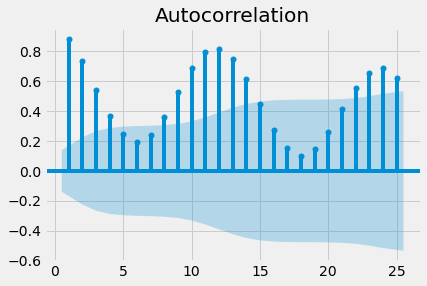

In [37]:
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(yn, lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

#Looks like there is a peak at 1 and 12. We need to break down the seasonality

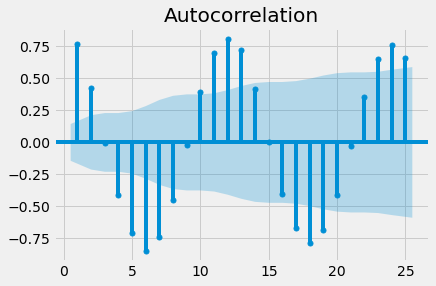

In [41]:
# Subtract the rolling mean
yn2 = yn - yn.rolling(12).mean()

# Drop the NaN values
yn2 = yn2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(yn2, lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

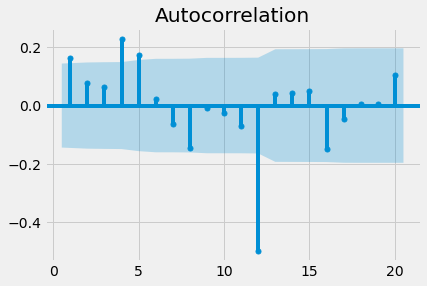

In [46]:
#take seasonal difference of the yn series
chg_no2 = yn.diff(12).dropna()

#plot the ACF
plot_acf(chg_no2, zero=False,lags=20)
plt.show()

C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


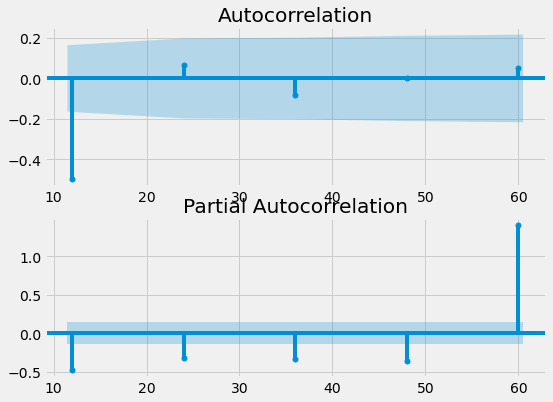

In [47]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(chg_no2, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(chg_no2, lags=lags, ax=ax2)

plt.show()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

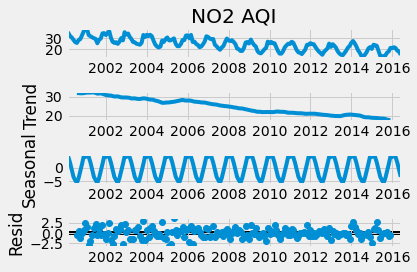

In [36]:
# Perform additive decomposition
decomp = seasonal_decompose(yn, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [48]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [63]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yn2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-373.09213508399444
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-344.6288607516369
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-197.28819932565509
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-329.07874590737356
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-349.8525341858227
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-350.2689288935796
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-285.6773397576188
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-357.20581457393564
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-388.05506760900874
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-368.9511107932814
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-198.58631273410788
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-333.19343261454765
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-380.3898130446313
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-376.05073187595
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-291.06531271407175
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-366.6253074875454
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-328.2148885842683
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-401.

#Looks like the lowest AIC is -449, so the SARIMAX model numbers area ARIMA(1,1,1)x(0,0,1,12)12

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3315      0.090      3.671      0.000       0.155       0.508
ma.L1         -0.9422      0.036    -26.443      0.000      -1.012      -0.872
ma.S.L12      -0.7395      0.077     -9.658      0.000      -0.890      -0.589
sigma2         0.0037      0.000      8.644      0.000       0.003       0.005


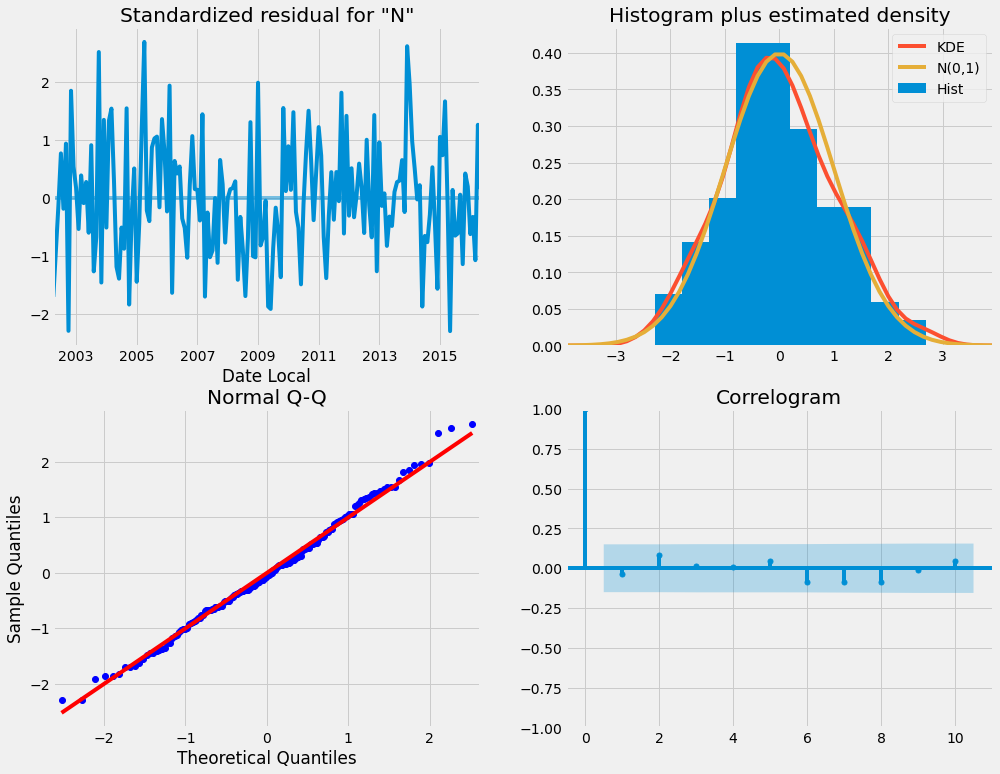

In [66]:
mod = sm.tsa.statespace.SARIMAX(yn2,
                                order=(1,1,1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [89]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            NO2 AQI   No. Observations:                  185
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 228.882
Date:                            Wed, 07 Jul 2021   AIC                           -449.764
Time:                                    05:17:20   BIC                           -437.221
Sample:                                01-31-2001   HQIC                          -444.674
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3315      0.090      3.671      0.000       0.155       0.508
ma.L1         -0.9422      0.036    -26.443      0.000      -1.012      -0.872
ma.S.L12      -0.7395      0.077     -9.658      0.000      -0.890      -0.589
sigma2         0.0037      0.000      8.644      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.66   Prob(JB):                         0.50
Heteroskedasticity (H):               0.71   Skew:                             0.20
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

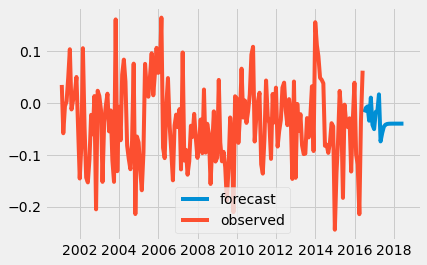

In [81]:
# Create SARIMA mean forecast
sarima_pred = results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(sarima_mean, label='forecast')
plt.plot(yn2, label='observed')
plt.legend()
plt.show()

In [92]:
# Create forecast object
forecast_object = results.get_forecast(steps=25)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

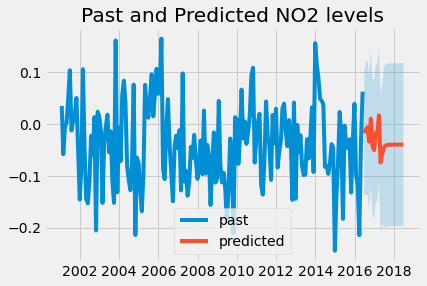

In [96]:
plt.figure()

# Plot past nO2 levels
plt.plot(yn2.index, yn2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.title('Past and Predicted NO2 levels')
plt.legend()
plt.show()